Scraping a dataset:The first step is to build a rich data set. We will collect textual and visual data for each movie.
Data scrapping is done from tmdb,www.themoviedb.org, as it's Open Source along with a handy api library: tmdbsimple which is very well documented for use. Although a free api key(available at signup) is required for dealing with data.
We are concerned about two features for each movie: 
1. Movie Plot
2. Poster for the corresponding movie.

In [1]:
import urllib2
import requests
import json
import imdb
import time
import itertools
import wget
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [2]:
posterFolder='movie_posters/'
if posterFolder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./'+posterFolder)
posterFolder

Folder already exists


'movie_posters/'

In [3]:
apiKey='b2db12a77bd83b7fa87202026d7f7ca5'
tmdb.API_KEY = apiKey
searchInstance = tmdb.Search()
def get_poster(movie):
    searchResponse = searchInstance.movie(query=movie)
    id=searchResponse['results'][0]['id']
    movie = tmdb.Movies(id)
    posterPath=movie.info()['poster_path']
    title=movie.info()['original_title']
    url='image.tmdb.org/t/p/original'+posterPath
    title='_'.join(title.split(' '))
    strCmd='wget -O '+posterFolder+title+'.jpg '+url
    os.system(strCmd)

def get_movie_id(movie):
    searchResponse = searchInstance.movie(query=movie)
    movieId=searchResponse['results'][0]['id']
    return movieId

def get_movie_info(movie):
    searchResponse = searchInstance.movie(query=movie)
    id=searchResponse['results'][0]['id']
    movie=tmdb.Movies(id)
    info=movie.info()
    return info

def get_movie_genres(movie):
    searchResponse = searchInstance.movie(query=movie)
    id=searchResponse['results'][0]['id']
    movie = tmdb.Movies(id)
    genres=movie.info()['genres']
    return genres

def get_overview(movie):
    searchResponse=searchInstance.movie(query=movie)
    id=searchResponse['results'][0]['id']
    movie=tmdb.Movies(id)
    overview=movie.info()['overview']
    return overview


In [5]:
#cross check for correctness of the functions
info=get_movie_info("Lord of the Rings")
print info
print '====================================================================='
print get_overview("Lord of the Rings")
print '====================================================================='
print get_movie_genres("Lord of the Rings")
print '====================================================================='
print get_movie_id("Lord of the rings")
print '====================================================================='
print get_poster("Lord of the Rings") #fetches me a poster to the desired path

{u'poster_path': u'/bxVxZb5O9OxCO0oRUNdCnpy9NST.jpg', u'production_countries': [{u'iso_3166_1': u'NZ', u'name': u'New Zealand'}, {u'iso_3166_1': u'US', u'name': u'United States of America'}], u'revenue': 871368364, u'overview': u'Young hobbit Frodo Baggins, after inheriting a mysterious ring from his uncle Bilbo, must leave his home in order to keep it from falling into the hands of its evil creator. Along the way, a fellowship is formed to protect the ringbearer and make sure that the ring arrives at its final destination: Mt. Doom, the only place where it can be destroyed.', u'video': False, u'id': 120, u'genres': [{u'id': 12, u'name': u'Adventure'}, {u'id': 14, u'name': u'Fantasy'}, {u'id': 28, u'name': u'Action'}], u'title': u'The Lord of the Rings: The Fellowship of the Ring', u'tagline': u'One ring to rule them all', u'vote_count': 8062, u'homepage': u'http://www.lordoftherings.net/', u'belongs_to_collection': {u'backdrop_path': u'/bccR2CGTWVVSZAG0yqmy3DIvhTX.jpg', u'poster_path'

In [6]:
print 'All the Movie data from TMDB gets stored in a dictionary with the following keys for access:'
info.keys()

All the Movie data from TMDB gets stored in a dictionary with the following keys for access:


[u'poster_path',
 u'production_countries',
 u'revenue',
 u'overview',
 u'video',
 u'id',
 u'genres',
 u'title',
 u'tagline',
 u'vote_count',
 u'homepage',
 u'belongs_to_collection',
 u'original_language',
 u'status',
 u'spoken_languages',
 u'imdb_id',
 u'adult',
 u'backdrop_path',
 u'production_companies',
 u'release_date',
 u'popularity',
 u'original_title',
 u'budget',
 u'vote_average',
 u'runtime']

In [7]:
allMovies=tmdb.Movies()
topMovies=allMovies.popular()

# This is a dictionary, and to access results we use the key 'results' which returns info on 20 movies
print(len(topMovies['results']))
top20Movs=topMovies['results']

20


In [8]:
firstMovie=top20Movs[0]
print "Here is all the information you can get on this movie - "
print firstMovie
print "\n\nThe title of the first movie is - ", firstMovie['title']

Here is all the information you can get on this movie - 
{u'poster_path': u'/qL0w9X1dVT3dnkZg3SrYtPFUHMs.jpg', u'title': u'Dawn of the Planet of the Apes', u'overview': u'A group of scientists in San Francisco struggle to stay alive in the aftermath of a plague that is wiping out humanity, while Caesar tries to maintain dominance over his community of intelligent apes.', u'release_date': u'2014-06-26', u'popularity': 111.085918, u'original_title': u'Dawn of the Planet of the Apes', u'backdrop_path': u'/rjUl3pd1LHVOVfG4IGcyA1cId5l.jpg', u'vote_count': 3848, u'video': False, u'adult': False, u'vote_average': 7.3, u'genre_ids': [878, 28, 18, 53], u'id': 119450, u'original_language': u'en'}


The title of the first movie is -  Dawn of the Planet of the Apes


In [9]:
for i in range(len(top20Movs)):
    mov=top20Movs[i]
    title=mov['title']
    print title
    if i==4:
        break

Dawn of the Planet of the Apes
Beauty and the Beast
Rise of the Planet of the Apes
Despicable Me 3
Spider-Man: Homecoming


In [10]:
for i in range(len(top20Movs)):
    mov=top20Movs[i]
    genres=mov['genre_ids']
    print genres
    if i==4:
        break

[878, 28, 18, 53]
[10751, 14, 10749]
[53, 28, 18, 878]
[878, 12, 16, 35, 10751]
[28, 12, 878]


In [11]:
# Create a tmdb genre object
genreInstance=tmdb.Genres()
# the list() method of the Genres() class returns a listing of all genres in the form of a dictionary.
listOfGenres=genreInstance.list()['genres']
(listOfGenres[6]['name'])

u'Drama'

In [12]:
#To create a map between genre id of each genre and name of the genre
GenreIDToName={}
genreNameBuild=[]
for i in range(len(listOfGenres)):
    genreId=listOfGenres[i]['id']
    genreName=listOfGenres[i]['name']
    genreNameBuild.append(genreName)
    GenreIDToName[genreId]=genreName

print GenreIDToName[12]
print genreNameBuild

Adventure
[u'Action', u'Adventure', u'Animation', u'Comedy', u'Crime', u'Documentary', u'Drama', u'Family', u'Fantasy', u'History', u'Horror', u'Music', u'Mystery', u'Romance', u'Science Fiction', u'TV Movie', u'Thriller', u'War', u'Western']


Making use of the tmdb api, we will just pull results from the top 50 pages. The "page" attribute of the command top_movies=all_movies.popular() will be used for this.

Data retrieved using tmdb api is then saved into pickle files for easy usage when required.

In [13]:
# Comment out this cell once the data is saved into pickle file.
allMovies=tmdb.Movies()
top1000Movies=[]
print('Pulling movie list,')
for i in range(1,51):
    if i%15==0:
        time.sleep(7)#to adjust the specified range time lag between number of requests
    moviesOnThisPage=allMovies.popular(page=i)['results']
    top1000Movies.extend(moviesOnThisPage)
len(top1000Movies)
f3=open('movie_list123.pckl','wb')
pickle.dump(top1000Movies,f3)
f3.close()
print('Completed!')

Pulling movie list,
Completed!


# Pairwise analysis of movie Genres
As our dataset is multi label, simply looking at the distribution of genres is not sufficient. It might be beneficial to see which genres co-occur, as it might shed some light on inherent biases in our dataset. For example, it would make sense if romance and comedy occur together more often than documentary and comedy. Such inherent biases tell us that the underlying population we are sampling from itself is skewed and not balanced. We may then take steps to account for such problems. Even if we don't take such steps, it is important to be aware that we are making the assumption that an unbalanced dataset is not hurting our performance and if need be, we can come back to address this assumption. Good old scientific method, eh?
So for the top 1000 movies let's do some pairwise analysis for genre distributions. Our main purpose is to see which genres occur together in the same movie. So, we first define a function which takes a list and makes all possible pairs from it. Then, we pull the list of genres for a movie and run this function on the list of genres to get all pairs of genres which occur together.

(18, 18)
19


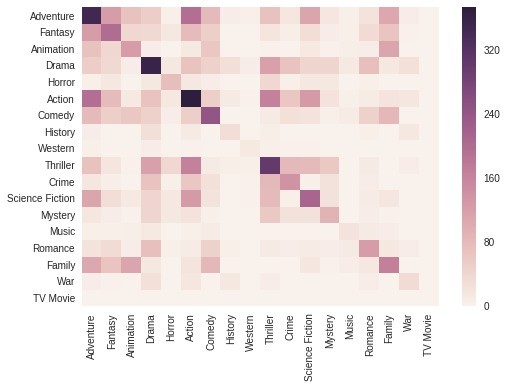

In [14]:
f3=open('movie_list123.pckl','rb')
top1000Movies=pickle.load(f3)
f3.close()

# This function generates all possible pairs of movies
def list2pairs(l):
    # itertools.combinations(l,2) makes all pairs of length 2 from list l.
    pairs=list(itertools.combinations(l, 2))
    # then the one item pairs, as duplicate pairs aren't accounted for by itertools
    for i in l:
        pairs.append([i,i])
    return pairs

# get all genre lists pairs from all movies
allPairs = []
for movie in top1000Movies:
    allPairs.extend(list2pairs(movie['genre_ids']))
    
nrIds = np.unique(allPairs)
visGrid = np.zeros((len(nrIds), len(nrIds)))
for p in allPairs:
    visGrid[np.argwhere(nrIds==p[0]), np.argwhere(nrIds==p[1])]+=1
    if p[1] != p[0]:
        visGrid[np.argwhere(nrIds==p[1]), np.argwhere(nrIds==p[0])]+=1
        
        
print visGrid.shape
print len(GenreIDToName.keys())
#============================Did not understand yet=================================================================
annotLookup = []
for i in xrange(len(nrIds)):
    annotLookup.append(GenreIDToName[nrIds[i]])

sns.heatmap(visGrid, xticklabels=annotLookup, yticklabels=annotLookup)
#===================================================================================================================

The above image shows how often the genres occur together, as a heatmap
Important thing to notice in the above plot is the diagonal. The diagonal corresponds to self-pairs, i.e. number of times a genre, say Drama occurred with Drama. Which is basically just a count of the total times that genre occurred!
As we can see there are a lot of dramas in the data set, it is also a very unspecific label. There are nearly no documentaries or TV Movies. Horror is a very distinct label, and romance is also not too widely spread.
To account for this unbalanced data, there are multiple things we can try to explore what interesting relationships can be found.

# Delving Deeper into co-occurrence of genres
What we want to do now is to look for nice groups of genres that co-occur, and see if it makes sense to us logically? Intuitively speaking, wouldn't it be fun if we saw nice boxes on the above plot - boxes of high intensity i.e. genres that occur together and don't occur much with other genres. In some ways, that would isolate the co-occurrence of some genres, and heighten the co-occurrence of others.

While the data may not show that directly, we can play with the numbers to see if that's possible. The technique used for that is called biclustering.

In [15]:
from sklearn.cluster import SpectralCoclustering

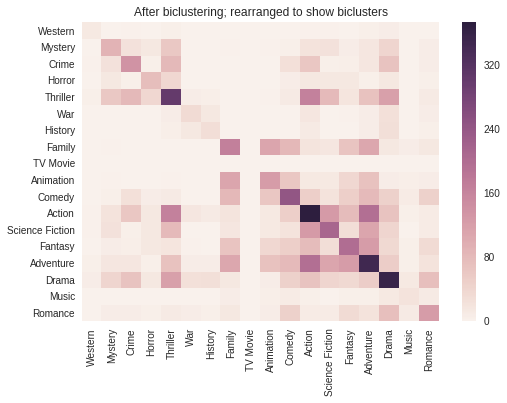

In [16]:
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)

fitData = visGrid[np.argsort(model.row_labels_)]
fitData = fitData[:, np.argsort(model.column_labels_)]

annotLookupSorted = []
for i in np.argsort(model.row_labels_):
    annotLookupSorted.append(GenreIDToName[nrIds[i]])

sns.heatmap(fitData, xticklabels=annotLookupSorted, yticklabels=annotLookupSorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

Looking at the above figure, "boxes" or groups of movie genres automatically emerge!
Intuitively - Crime, Sci-Fi, Mystery, Action, Horror, Drama, Thriller, etc co-occur. AND, Romance, Fantasy, Family, Music, Adventure, etc co-occur.
That makes a lot of intuitive sense, right?
One challenge is the broad range of the drama genre. It makes the two clusters highly overlapping. If we merge it together with action thriller, etc. We will end up with nearly all movies just having that label.

### Based on playing around with the stuff above, we can sort the data into the following genre categories - "Drama, Action, ScienceFiction, exciting(thriller, crime, mystery), uplifting(adventure, fantasy, animation, comedy, romance, family), Horror, History"
Note: that this categorization is subjective and by no means the only right solution. One could also just stay with the original labels and only exclude the ones with not enough data. Such tricks are important to balance the dataset, it allows us to increase or decrease the strength of certain signals, making it possible to improve our inferences :)

#### Done before, reading from pickle file now to maintain consistency of data!
#### We now sample 100 movies per genre. Problem is that the sorting is by popular movies, so they will overlap.
#### Need to exclude movies that were already sampled.

In [29]:
movies=[]
baseYear=2017


doneIds=[]
for gId in nrIds:
#    print('Pulling movies for genre ID '+gId)
    baseYear -= 1
    for page in xrange(1,6,1):
        time.sleep(0.5)
    
        url = 'https://api.themoviedb.org/3/discover/movie?api_key=' + apiKey
        url += '&language=en-US&sort_by=popularity.desc&year=' + str(baseYear) 
        url += '&with_genres=' + str(gId) + '&page=' + str(page)

        data = urllib2.urlopen(url).read()

        dataDict = json.loads(data)
        movies.extend(dataDict["results"])
    doneIds.append(str(g_id))
print ("Pulled movies genres")

Pulled movies genres


In [21]:
#f6=open("movies_for_posters",'wb')
#pickle.dump(movies,f6)
#f6.close()

In [24]:
f6=open("movies_for_posters",'rb')
movies=pickle.load(f6)
f6.close()

In [25]:
movies

[{u'adult': False,
  u'backdrop_path': u'/n1y094tVDFATSzkTnFxoGZ1qNsG.jpg',
  u'genre_ids': [28, 12, 35, 10749],
  u'id': 293660,
  u'original_language': u'en',
  u'original_title': u'Deadpool',
  u'overview': u'Based upon Marvel Comics\u2019 most unconventional anti-hero, DEADPOOL tells the origin story of former Special Forces operative turned mercenary Wade Wilson, who after being subjected to a rogue experiment that leaves him with accelerated healing powers, adopts the alter ego Deadpool. Armed with his new abilities and a dark, twisted sense of humor, Deadpool hunts down the man who nearly destroyed his life.',
  u'popularity': 22.75329,
  u'poster_path': u'/inVq3FRqcYIRl2la8iZikYYxFNR.jpg',
  u'release_date': u'2016-02-09',
  u'title': u'Deadpool',
  u'video': False,
  u'vote_average': 7.3,
  u'vote_count': 9516},
 {u'adult': False,
  u'backdrop_path': u'/9BVHn78oQcFCRd4M3u3NT7OrhTk.jpg',
  u'genre_ids': [18, 14, 12],
  u'id': 283366,
  u'original_language': u'en',
  u'original_

In [28]:
#to remove duplicate movies
movieIds = [m['id'] for m in movies]
print "Movies in total ",len(movieIds)," movies"
movieIds=np.unique(movieIds)
print len(movieIds)
seenBefore=[]
noDuplicateMovies=[]
for i in range(len(movies)):
    movie=movies[i]
    id=movie['id']
    if id in seenBefore:
        continue
#         print "Seen before"
    else:
        seenBefore.append(id)
        noDuplicateMovies.append(movie)
print "After eliminating duplicates we have ",len(noDuplicateMovies), " movies"

Movies in total  1653  movies
1587
After eliminating duplicates we have  1587  movies


In [33]:
#pull out posters for movies
posterMmovies=[]
counter=0
moviesNoPoster=[]
print("Total movies : ",len(movies))
for movie in movies:
    id=movie['id']
    title=movie['title']
    if counter%300==0 and counter!=0:
        print "Done with ",counter," movies!"
        print "Trying to get poster for ",title
    try:
        getPoster(title)
        posterMovies.append(movie)
    except:
        try:
            time.sleep(7)
            getPoster(title)
            posterMovies.append(movie)
        except:
            moviesNoPoster.append(movie)
    counter+=1
print("Done with all the posters!")

('Total movies : ', 1653)
Done with  300  movies!
Trying to get poster for  Her
Done with  600  movies!
Trying to get poster for  The Hangover
Done with  900  movies!
Trying to get poster for  The Butterfly Effect 2
Done with  1200  movies!
Trying to get poster for  Breaking Dawn
Done with  1500  movies!
Trying to get poster for  The Other Side of Heaven
Done with all the posters!


In [34]:
print len(moviesNoPoster)
print len(posterMovies)

191
1462


In [35]:
f=open('poster_movies.pckl','r')
posterMovies=pickle.load(f)
f.close()

In [39]:
f=open('no_poster_movies.pckl','r')
moviesNoPoster=pickle.load(f)
f.close()

In [41]:
posterMovies

[{u'adult': False,
  u'backdrop_path': u'/n1y094tVDFATSzkTnFxoGZ1qNsG.jpg',
  u'genre_ids': [28, 12, 35, 10749],
  u'id': 293660,
  u'original_language': u'en',
  u'original_title': u'Deadpool',
  u'overview': u'Based upon Marvel Comics\u2019 most unconventional anti-hero, DEADPOOL tells the origin story of former Special Forces operative turned mercenary Wade Wilson, who after being subjected to a rogue experiment that leaves him with accelerated healing powers, adopts the alter ego Deadpool. Armed with his new abilities and a dark, twisted sense of humor, Deadpool hunts down the man who nearly destroyed his life.',
  u'popularity': 19.013921,
  u'poster_path': u'/inVq3FRqcYIRl2la8iZikYYxFNR.jpg',
  u'release_date': u'2016-02-09',
  u'title': u'Deadpool',
  u'video': False,
  u'vote_average': 7.3,
  u'vote_count': 9516},
 {u'adult': False,
  u'backdrop_path': u'/9BVHn78oQcFCRd4M3u3NT7OrhTk.jpg',
  u'genre_ids': [18, 14, 12],
  u'id': 283366,
  u'original_language': u'en',
  u'original

Assume every movie can have multiple genres, and then it becomes a multi-label classification problem. For example, a movie can be Action, Horror and Adventure simultaneously. Thus, every movie can be more than one genre.

Implementation for genre prediction problem:
<ul>
  <li>Problem is framed here as a multi-label problem, i.e. we will try to predict multiple genres associated with a movie, which will be our output Y</li>
  <li>We will use 2 different kinds of X - text and images.</li>
  <li>For the text part - Input features being used to predict the genre is a form of the movie's plot available from TMDB using the property 'overview'. This will be our X.</li>
  <li>For the image part - we will use the scraped poster images as our X.</li>
</ul>

### Some steps in data cleaning

In [43]:
moviesWithOverviews=[]
for i in range(len(noDuplicateMovies)):
    movie=noDuplicateMovies[i]
    id=movie['id']
    overview=movie['overview']
    
    if len(overview)==0:
        continue
    else:
        moviesWithOverviews.append(movie)
        
len(moviesWithOverviews)

1559

Now let's store the genre's for these movies with overview in a list that we will later transform into a binarized vector.

In [44]:
genres=[]
allIds=[]
for i in range(len(moviesWithOverviews)):
    movie=moviesWithOverviews[i]
    id=movie['id']
    genreIds=movie['genre_ids']
    genres.append(genreIds)
    allIds.extend(genreIds)

In [45]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb=MultiLabelBinarizer()
Y=mlb.fit_transform(genres)
print Y[1558]       #last element
print mlb.classes_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[   12    14    16    18    27    28    35    36    37    53    80    99
   878  9648 10402 10749 10751 10752 10769 10770]


In [49]:
print Y.shape
print np.sum(Y, axis=0)

(1559, 20)
[328 243 239 652 214 439 402 141  47 450 240  44 250 187 117 230 265  82
  19  90]


In [51]:
len(listOfGenres)

19

So, the discrepancy observed here can be seen by observing dimensions of Y(1559, 20) and length of listOfGenres=19,

Actually there is one genre that is not accounted for when retrieving genre list via tmdb genre object.
On matching the two lists, we get to know that the extra genre id is 10769, which can is found using the code below

In [54]:
for i in set(allIds):
    if i not in GenreIDToName.keys():
        print i

10769


First I thought of ignoring all the movies with this genre, but looking into the dataset, I found there were to many movies with this particular genre id. So, can't ignore all the movies with this genre id.

Going forth in my research I googled more and went into their documentation and found that this ID corresponds to the genre "Foreign". So, added it to the dictionary of genre names manually.

In [56]:
GenreIDToName[10769]="Foreign" #Adding it to the dictionary

In [58]:
GenreIDToName

{12: u'Adventure',
 14: u'Fantasy',
 16: u'Animation',
 18: u'Drama',
 27: u'Horror',
 28: u'Action',
 35: u'Comedy',
 36: u'History',
 37: u'Western',
 53: u'Thriller',
 80: u'Crime',
 99: u'Documentary',
 878: u'Science Fiction',
 9648: u'Mystery',
 10402: u'Music',
 10749: u'Romance',
 10751: u'Family',
 10752: u'War',
 10769: 'Foreign',
 10770: u'TV Movie'}

In [59]:
#Our input feature x shall be a movie's overview/plot, so here's the plot for a movie spectre
testMovie=moviesWithOverviews[5]
inputFeature = testMovie['overview']
testTitle=testMovie['title']
print "The overview for the movie",testTitle," is - \n\n"
print inputFeature

The overview for the movie Spectre  is - 


A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE.


## Building the matrix X for input features
So, how do we store this movie overview in a matrix?
Do we just store the whole string? We know that we need to work with numbers, but this is all text. What do we do?!

The X matrix is stored using "Bag of words" representation. 

The basic idea of this representation in this context is that we can think of all the distinct words that are possible in the movies' reviews as a distinct object. And then every movie overview can be thought as a "Bag" containing a bunch of these possible objects.

For example, in the case of Spectre the movie above - The "Bag" contains the words ("Cryptic", "message", "Bond’s", "sinister", "organization" ...... "secret"...."the"). We make such lists for all movie overviews. Finally, we binarize again like we did above for Y. 
function used to perform the job:
scikit-learn function CountVectorizer() 

Ex - if our vocabular was 5 words - "I","am","a","good","boy", then the representation for the sentence "I am a boy" would be [1 1 1 0 1], and for the sentence "I am good" would be [1 1 0 1 0].

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
import re

totalContent=[]
for i in range(len(moviesWithOverviews)):
    movie=moviesWithOverviews[i]
    id=movie['id']
    overview=movie['overview']
    overview=overview.replace(',','')
    overview=overview.replace('.','')
    totalContent.append(overview)

In [62]:
print totalContent[0]
print len(totalContent)

Based upon Marvel Comics’ most unconventional anti-hero DEADPOOL tells the origin story of former Special Forces operative turned mercenary Wade Wilson who after being subjected to a rogue experiment that leaves him with accelerated healing powers adopts the alter ego Deadpool Armed with his new abilities and a dark twisted sense of humor Deadpool hunts down the man who nearly destroyed his life
1559


## Tf-IDF is being used to reduce dimensionality of the input matrix X ,
Tf-IDf would help remove all the words that are very common (like 'the','a','an') from input matrix X.

A good approach I think would be to exclude all words that occur in too many or too few documents, as these are very unlikely to be discriminative. This is because words that only occur in one document most probably are names, and words that occur in nearly all documents are probably stop words.
So, implicitly without tuning min_df and max_df parameters on some validation set, I'll choose their values by guessing.

In [63]:
# min_df makes sure we exclude words that occur rarely
# max_df makes sure to exclude words that occur too frequently
vectorize=CountVectorizer(max_df=0.95, min_df=0.005)
X=vectorize.fit_transform(totalContent)

In [64]:
X.shape

(1559, 1344)

In [66]:
#Thus,each movie's overview is represented by a (1,1344) vector

In [67]:
#f4=open('X.pckl','wb')
#f5=open('Y.pckl','wb')
#pickle.dump(X,f4)
#pickle.dump(Y,f5)
#f6=open('Genredict.pckl','wb')
#pickle.dump(Genre_ID_to_name,f6)
#f4.close()
#f5.close()
#f6.close()

In [71]:
f4=open('movies_with_overviews.pckl','wb')
pickle.dump(moviesWithOverviews,f4)
f4.close()

#moviesWithOverviews

[u'War',
 u'Crime',
 u'Music',
 u'Comedy',
 u'History',
 u'Western',
 u'Thriller',
 u'Mystery',
 u'Adventure',
 u'TV Movie',
 u'Fantasy',
 u'Animation',
 u'Foreign',
 u'Drama',
 u'Documentary',
 u'Science Fiction',
 u'Horror',
 u'Action',
 u'Romance',
 u'Family']

In [82]:
parameters = {'kernel':['linear'], 'C':[0.01, 0.1, 1.0]}

parameters

{'C': [0.01, 0.1, 1.0], 'kernel': ['linear']}